# Explore the effect of correlations

In [1]:
import orsa
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

sns.set(style = 'white')
mpl.rc('xtick.minor', visible = True)
mpl.rc('ytick.minor', visible = True)
mpl.rc('xtick', direction='in', top=True, bottom = True)
mpl.rc('ytick', direction='in', right=True, left = True)

print(orsa.__version__)

0.8.5


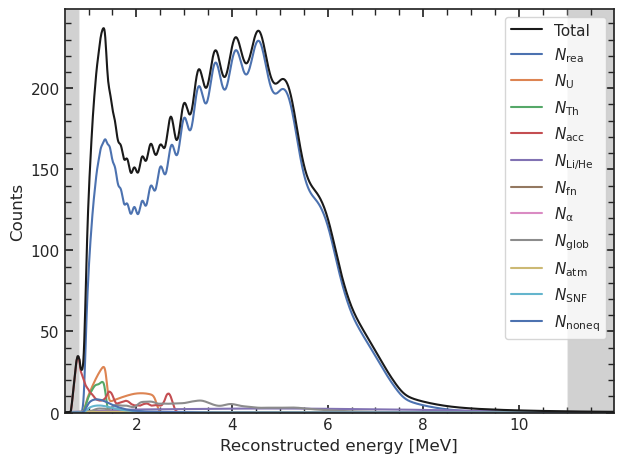

In [2]:
model = orsa.model.read_json('inputs/test_model.json')
model.exposure = 6*365.25
model

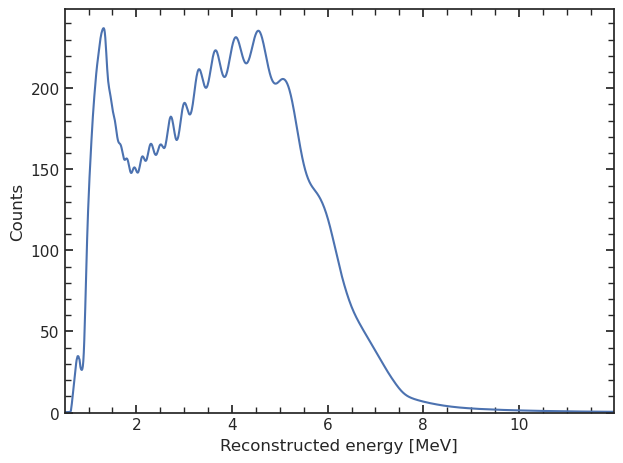

In [3]:
data = model.get_spectrum(asimov = True)
data

In [4]:
model.use_shape_uncertainty = False
cf = orsa.probability.CostFunction(ll=orsa.probability.ll_binned, model=model, data=data, ll_args = dict())
true_values = cf.get_params_to_fit()[0]
res = orsa.fit.minuit(cf)
res.true_values = true_values

Cost function parsed as LogLikelihood-like


In [8]:
import os
mcmc_path = 'inputs/test_mcmc.h5'
if os.path.isfile(mcmc_path):
    res_mcmc = orsa.fit.parse_emcee(mcmc_path)
    res_mcmc.labels = res.labels
    res_mcmc.formatted_labels = res.formatted_labels
    res_mcmc.true_values = res.true_values
    res_mcmc.cost_function = res.cost_function
else:
    # res_mcmc = orsa.fit.emcee(cf, 10000, err_scale=res.errors, backend=mcmc_path)
    # res_mcmc.true_values = res.true_values
    pass

res_mcmc.discard = 1000

Discarded 5000 samples for best fit values. Recalculate them by looking at the chain.


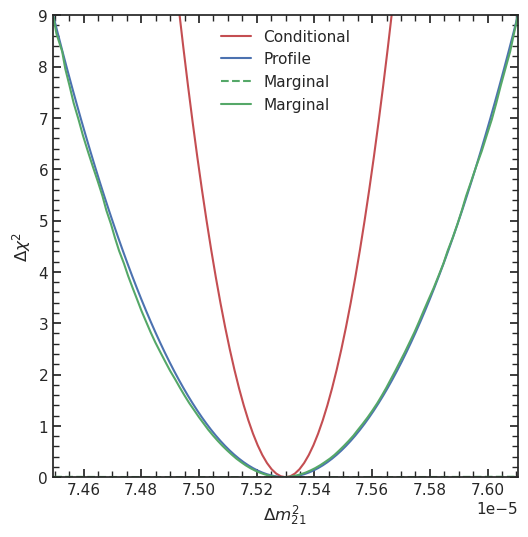

In [14]:
label = 'dm2_21:'
res.get_samples(100000)
n_points = 101

fig, ax = plt.subplots(figsize = (6,6))
fig, ax = orsa.plot.profile(res, label = label, kind = 'conditional', n_sigmas = 3, n_samples = n_points, use_minuit = False, subtract_min = True, ax = ax, c = 'r', plot_kwargs=dict(ls = '-', label = 'Conditional'))
fig, ax = orsa.plot.profile(res, label = label, kind = 'profile', n_sigmas = 3, n_samples = n_points, use_minuit = False, subtract_min = True, ax = ax, c = 'b', plot_kwargs=dict(ls = '-', label = 'Profile'))

# Marginalization is unreliable when covariance is not positive-semidefinite. Try using emcce for the fit.
fig, ax = orsa.plot.profile(res, label = label, kind = 'marginal', n_sigmas = 3, n_samples = n_points, use_minuit = False, subtract_min = True, ax = ax, c = 'g', plot_kwargs=dict(ls = '--', label = 'Marginal'))
fig, ax = orsa.plot.profile(res_mcmc, label = label, kind = 'marginal', n_sigmas = 3, n_samples = n_points, use_minuit = False, subtract_min = True, ax = ax, c = 'g', plot_kwargs=dict(ls = '-', label = 'Marginal'))

ax.legend(frameon = False)

/home/ubuntu/miniconda3/lib/python3.11/site-packages/orsa/plot/plot.py:850: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


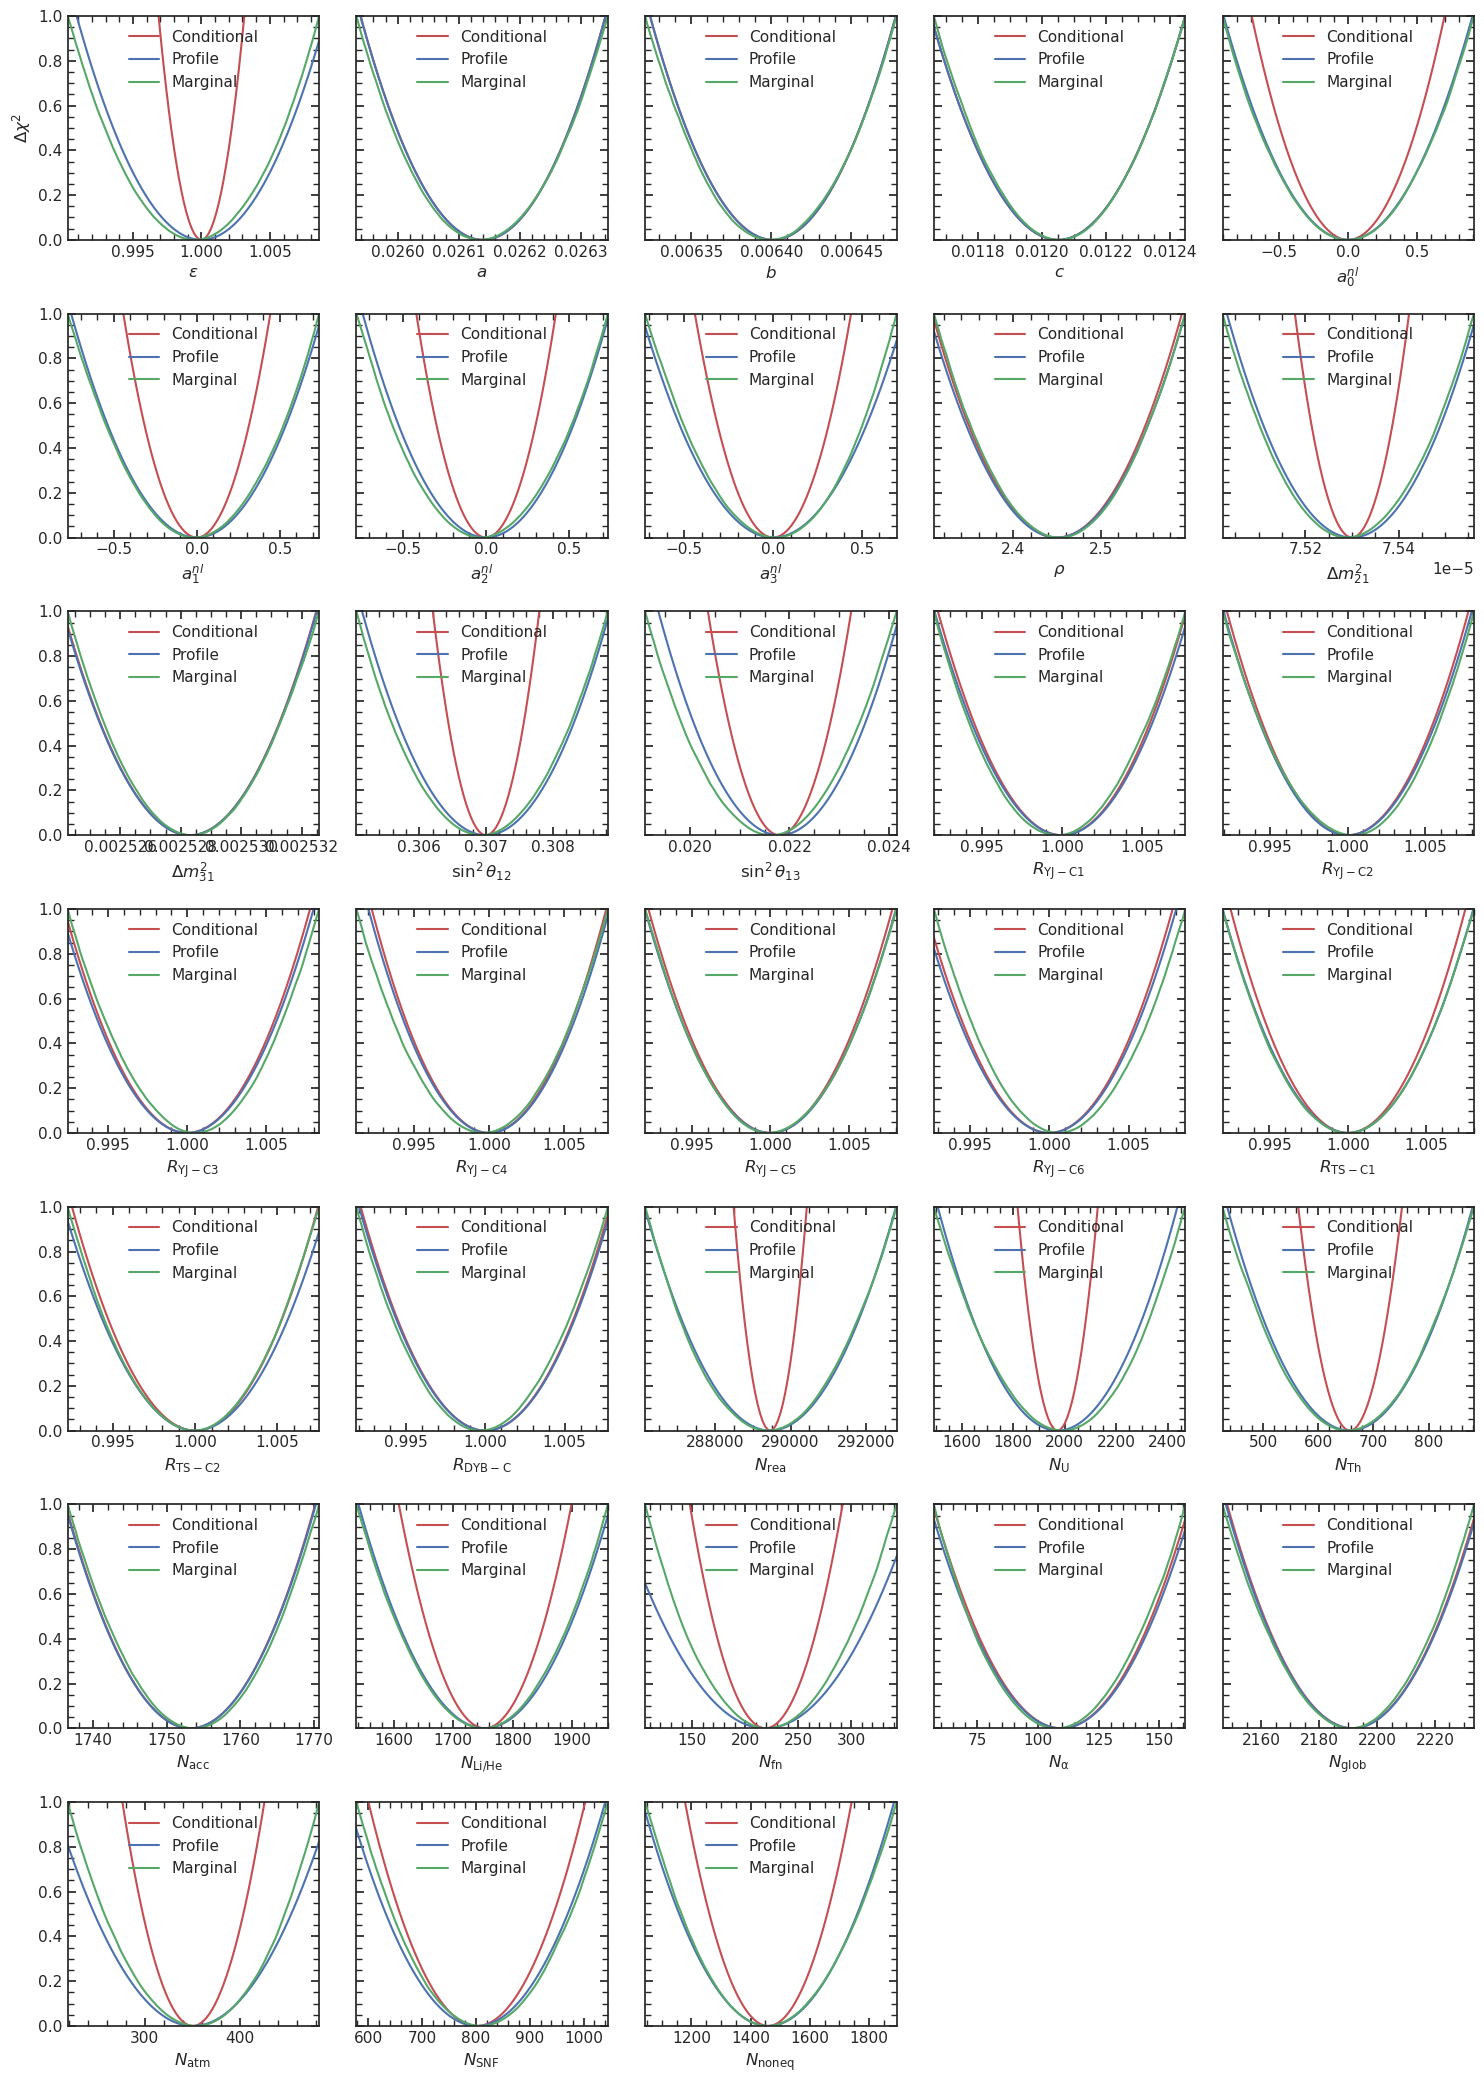

In [16]:
fig, axes = orsa.plot.profiles(res, kind = 'conditional', n_sigmas = 1, n_samples = n_points, use_minuit = False, subtract_min = True, axes = None, c = 'r', plot_kwargs = dict(ls = '-', label = 'Conditional'), n_cols = 5, box_size = 3, which = None)
fig, axes = orsa.plot.profiles(res, kind = 'profile', n_sigmas = 1, n_samples = n_points, use_minuit = False, subtract_min = True, axes = axes, c = 'b', plot_kwargs = dict(ls = '-', label = 'Profile'), n_cols = 5, box_size = 3, which = None)
fig, axes = orsa.plot.profiles(res_mcmc, kind = 'marginal', n_sigmas = 1, n_samples = n_points, use_minuit = False, subtract_min = True, axes = axes, c = 'g', plot_kwargs = dict(ls = '-', label = 'Marginal'), n_cols = 5, box_size = 3, which = None)
for ax in axes:
    ax.legend(frameon = False)